# DATA 103 Final Project: Loan Default Prediction
Group 6
Members:

Banico, Adrian

Cuaresma, Matthew

Go, Michael Joseph

Rodriguez, Juan Carlos

## I. Background of the Study and Research Relevance: Introduction to the problem and Methodology Overview


### 1. Background of the Project:
The ability to accurately forecast loan defaults is critical for banks, lenders, borrowers, and to an extent, the overall economy. Loan defaults can carry substantial financial and reputational costs, not only for the institutions granting the loans but also for the individuals applying for them. From the bank's or lender’s perspective, the costs of loan defaults are significant. When a borrower fails to repay a loan, the bank incurs losses that may extend beyond the amount of the loan itself. These include operational costs (legal fees for recovery efforts), opportunity costs (loss of potential investment in non-faults and other ventures), and provisioning costs (funds set aside to cover bad loans). Moreover, high default rates may lead to an increase in non-performing assets (NPAs), eroding the bank's profitability and affecting its capital adequacy ratio.

For borrowers, accurate loan default forecasting is equally critical. An incorrectly labeled borrower, identified as high-risk when they are not, could face consequences, such as higher interest rates, denial of credit, or reduced financial opportunities. The bank also incurs a loss in the form of a loss of clients. This project emphasizes the importance of building models to forecast loan defaults. By accurately distinguishing between borrowers who are likely to default and those who are not, banks can manage their risks more effectively while ensuring fair treatment of borrowers.

**Objective:** With this in mind, The intention of this project is to utilize machine learning methods in order to forecast loan defaults.

This project not only aims to provide a predictive model for predicitng loan defaults but also aims to compare which type of model is the best performing givien the dataset.



### 2. The dataset:

The dataset that we are using is called the Loan Default Prediction Dataset obtained from Kaggle. https://www.kaggle.com/datasets/nikhil1e9/loan-default?fbclid=IwZXh0bgNhZW0CMTEAAR2dr7wVPorQHLGJmqUibkD9vZ5OEjBPFqVMZtjpnK_zv2ExufTgiKurPW8_aem_mpY1P1c9NUcKCOh3qWuJDA


**The dataset contains the following features:**


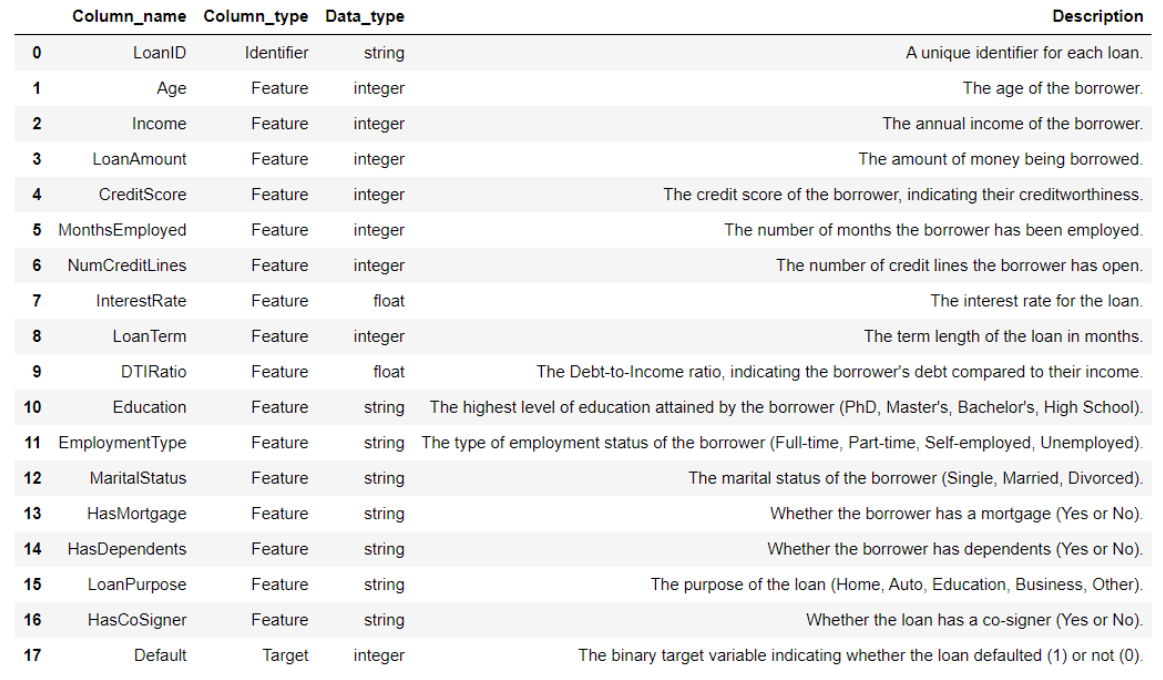

Each loan has a unique ID representing a person and a loan that they have. There are 16 features in the dataset including the default indicator. The default column is binary. 1 if the person defaulted on the loan and 0 if the person did not. Upon looking into the dataset, we had observed that the dataset is very imbalanced with only 11.61% of the dataset being defaults. This highlights that defaults are very rare in the dataset and since defaults are not necessarily considered to be common behavior in commercial bank lending, defaults may be anomalies in that they exhibit behavior or characteristics that may be significantly far off from the average.


### 3. Project Objectives:

Considering this, a key part of this project is to see whether the loans that do default have characteristics that are far off from the loans that don't. There are many types of machine learning models that could be implemented. However, loan defaults are quite infrequent, and this is exhibited in the dataset that we will use for this project. As this project entails to also determine which type of model performs best, the choice of model is also a central focus of our project. Machine learning models, particularly classification models broadly fall into many categories, but for this project we will focus on the following:

**A. Classical Machine Learning Models**
These models rely on established techniques and use statistical and algorithmic techniques to identify patterns and outliers in the data. Classical models utilize the following methods of running models
1. Feature selection: Choosing the most relevant variables for prediction.
2. Feature scaling: Normalizing data to ensure consistency.
3. Model training and validation: Using selected features to train the model and fine-tune its parameters.

**B. Deep Learning - Neural Networks**
Deep learning, a subset of machine learning, is inspired by the structure and function of the human brain through artificial neural networks. Unlike classical models, deep learning models:d
1. Automatically learn features: They identify complex patterns and relationships in raw data without the need for manual feature selection or engineering.
2. Handle high-dimensional data effectively: This makes them suitable for large datasets with intricate relationships.
3. Adapt dynamically: As more data is fed into the system, the model improves continuously.

This project will utilize at least one model of each machine-learning model type, and will compare model performance metrics in order to determine which type of model performs best in this type of objective.

### 4. Assesing the models: The metric to be used to asses model performance and choose best model

When it comes to loan default forecasting, it is important to minimize both false positives, datapoints classified as defaults even though it is not, as well as false negatives, defaults classified as non-defaults even if it truly is. This is becvause of the costs highlighted earlier wherein the costs of a person being incorrectly labeled as a defaulter and a defaulter person incorrectly labeled as a non-defaulter has severe costs for the bank and the borrower. This means that the metric to be used to measure the best model is the model that accounts for both false positives and false negatives. As such, the metric to be used to determine the best model is a combination of both accuracy and recall, meaning that **F1 score is the metric to be used**.

The best model chosen from the classical and deep learning models will be based on the resulting F1 metric


## II. List of Requirements
The list of requirements needed for this project are the various libraries needed to run the exploratory data analyses and the various models that we will run.

1. Pandas, Visualization, and data preparation libraries
- pandas
- seaborn
- matplotlib
- minmax scaler & One-hot encoder
2. Libraries for models training
- isolation forest
- tensorflow
- local outlier factor
3. Other libraries needed
- Shap

Additioanlly, the library is loaded via github wherein the dataset downloaded from kaggle is uploaded to github for easy access

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import shap
shap.initjs()

In [ ]:
# Uploading loan_default dataset

loan_default = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA103/refs/heads/main/Loan_default.csv')
loan_default.head()

#### Column names and Descriptions: The following are the list of the variables and their corresponding descriptions obtained from the Kaggle Link

| Column Name       | Description                                                                                                   |
|-------------------|---------------------------------------------------------------------------------------------------------------|
| LoanID            | A unique identifier for each loan.                                                                            |
| Age               | The age of the borrower.                                                                                      |
| Income            | The annual income of the borrower.                                                                            |
| LoanAmount        | The amount of money being borrowed.                                                                           |
| CreditScore       | The credit score of the borrower, indicating their creditworthiness.                                          |
| MonthsEmployed    | The number of months the borrower has been employed.                                                          |
| NumCreditLines    | The number of credit lines the borrower has open.                                                             |
| InterestRate      | The interest rate for the loan.                                                                               |
| LoanTerm          | The term length of the loan in months.                                                                        |
| DTIRatio          | The Debt-to-Income ratio, indicating the borrower's debt compared to their income.                            |
| Education         | The highest level of education attained by the borrower (PhD, Master’s, Bachelor’s, High School).             |
| EmploymentType    | The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).              |
| MaritalStatus     | The marital status of the borrower (Single, Married, Divorced).                                               |
| HasMortgage       | Whether the borrower has a mortgage (Yes or No).                                                              |
| HasDependents     | Whether the borrower has dependents (Yes or No).                                                              |
| LoanPurpose       | The purpose of the loan (Home, Auto, Education, Business, Other).                                             |
| HasCoSigner       | Whether the loan has a co-signer (Yes or No).                                                                 |
| Default           | The binary target variable indicating whether the loan defaulted (1) or not (0).                              |



## III. Exploratory Analysis
Exploring the dataset would mean aobserving and analyzing the data in order to understand the dataset that we are working with.

The following are the steps that will be undertaken for the exploratory analyses

1. Checking for Misclassified datatypes
2. Checking for null values
3. Observing the distribution of the data

### A. Checking for Misclassified Datatypes

In [ ]:
loan_default.info()

There are multi-categorical variables in terms of string. Such as Education and Loan type. The multi-categorical variables are recorded in their string format, such as under education, the types are High School, College, and so on. As such these will be preprocessed and one-hot encoded

As there are 255347 unique loan ID

#### B. Checking for Null Values

In [ ]:
# Summing null values in all variables

loan_default.isnull().sum()

The dataset has no null or 0 values, and every variable are comprised of non-null data. Looking at the number of null values, none of the features exhibit that there are any null values or labeled as null in string.

#### C. Checking for Data Distribution: Distribution of the Loan Default and Independent variables

In [ ]:
# Viewing ratios of defaults
default_counts = loan_default['Default'].value_counts()

# Calculate the total number of entries
total_number = len(loan_default['Default'])

# Calculate percentages
default_percentages = (default_counts / total_number) * 100

# Display counts and percentages
print("Default Counts:")
print(default_counts)
print("Default Percentages:")
print(default_percentages)

The target variable of default, is highly imbalanced with only 11.61% of the column populated by people that had defaulted, therefore data balancing methods should be implemented to address this data imbalance.

#### Histogram of distribution of data

In [ ]:
# Visualizing the distributions of all of the variables thorugh a histogram

# List of columns to exclude from the histogram
exclude_columns = ['LoanID']  # Specify columns you want to exclude
columns_to_plot = [col for col in loan_default.columns if col not in exclude_columns]

# Set the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate rows based on total plots and columns

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Loop over each column and plot its histogram
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if loan_default[col].dtype == 'object':
        loan_default[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    else:
        loan_default[col].plot(kind='hist', bins=20, ax=ax, edgecolor='black')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Visualizing the continuous variables through a histogram, it can be seen that the histogram numerical variables resemble that of a square. This depicts that the data is uniformly or equally distributed. The same is true for the categorical variables wherein the bars of the histogram are also of equal length among the various classies per each categorical data

In [ ]:

# Define categorical and binary columns for ratio calculations
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner', 'Default']

# Initialize a dictionary to store the ratios
ratios = {}

# Calculate ratios for categorical variables
for col in categorical_columns:
    ratios[col] = loan_default[col].value_counts(normalize=True)  # Normalize gives proportions

# Calculate ratios for binary variables
for col in binary_columns:
    ratios[col] = loan_default[col].value_counts(normalize=True)  # Normalize gives proportions

# Display results
for col, ratio in ratios.items():
    print(f"Ratios for {col}:\n{ratio}\n")

The ratios above highlight that the independent categorical variables in the dataset are all equally distributed, in that each category has the same proportion as the other categories across all of the variables. The only categorical variable that has an unequal distribution is the deafult variable which is the target variable for this project

In [ ]:
loan_default.describe()

Based on the results of the statistics above, it can be seen that there are no outliers in the continuous data, with the max and minimum values highlighting that the data is generally well behaved as there is no very high or very low values. The histograms also highlights that the continuos values are all equally distributed but not normally distributed in that it covers all the values equally.

Looking at the distribution as well as the composition of the dataset, the dataset is very clean evidenced by the absence of null values, and the equal distribution of both categorical and numerical values

## IV. Data preprocessing/cleaning
Explain why the data was preprocessed that way
If you removed data, explain why removing the data was necessary

### A. Viewing the Unique values of each categorical variable


The categorical variabels of Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, and HasCoSigner are still in string and therefore have to be encoded in order to turn into multicategorical values

In [ ]:
loan_default.info()

In [ ]:
loan_default['Education'].unique()

In [ ]:
loan_default['EmploymentType'].unique()

In [ ]:
loan_default['MaritalStatus'].unique()

In [ ]:
loan_default['HasMortgage'].unique()

In [ ]:
loan_default['HasDependents'].unique()

In [ ]:
loan_default['LoanPurpose'].unique()

In [ ]:
# Checking for the unique values of HasCosigner

loan_default['HasCoSigner'].unique()

We can observe based on the results that only three categorical features out of seven that are binary that being HasMortgage, HasCosigner, and HasDependents as they are the only features that are either yes or no.

###B. Encoding the Binary Variables:
With has mortgage, has cosigner, and has dependents being answerable by yes or no, they can easily be binary encoded where 1=Yes, and 0=No.

In [ ]:
for c in ['HasMortgage',
          'HasDependents', 'HasCoSigner']:
    loan_default[c] = loan_default[c].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
loan_default['HasCoSigner'].unique()

### C. Encoding Multicategorical Variables:
The multi-categorical data, including features such as Education, EmploymentType, MaritalStatus, and LoanPurpose, represent unique qualitative categories without any ordinal relationship or implied severity. For instance, assigning numerical values like 1, 2, or 3 to categories in EmploymentType (e.g., employed, unemployed, and self-employed) could incorrectly suggest an order or ranking where none exists. To address this, these features are preprocessed using one-hot encoding, which creates separate binary variables for each category, ensuring that the categorical data is accurately represented without introducing unintended hierarchical meaning.



In [ ]:
loan_default_encoded = pd.get_dummies(loan_default, columns=['Education', 'EmploymentType', 'MaritalStatus','LoanPurpose'], drop_first=False)
loan_default_encoded

In [ ]:
loan_default_encoded.columns

In [ ]:
for c in ['Education_Bachelor\'s', 'Education_High School', 'Education_Master\'s',
          'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
          'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
          'MaritalStatus_Divorced', 'MaritalStatus_Married',
          'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
          'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']:
    loan_default_encoded[c] = loan_default_encoded[c].apply(lambda x: 1 if x == True else 0)


In [ ]:
loan_default_encoded

### D. MinMax Scaling for Continuous Features

As observed in the histogram distributions, the continuous features are uniformly distributed evidenced by the square shaped histograms. This estimator scales and translates each feature individually such that it is in the given range on the training set. This scaler linearly scales the data down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value

Additionally, the statistics highlight that the data itself does not exhibit any extreme values, and uniform throughout. MinMax Scaler works for this kind of data as it transforms each feature into a common scale (usually between 0 and 1), which is particularly beneficial for algorithms that rely on distance-based calculations or operate more effectively with normalized ranges.


MinMax Scaling is applied to all continuous features except for DTI ratio as the feature is already reflecting a proportion (0-1)

In [ ]:
# Loading minmax scaler
scaler = MinMaxScaler()

# Selecting the columns to scale
columns_to_scale = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm']

# Apply MinMaxScaler
loan_default_encoded[columns_to_scale] = scaler.fit_transform(loan_default_encoded[columns_to_scale])

In [ ]:
loan_default_encoded

### E. Creating Final Dataset For Use:

The dataset still contains the LoanID column which is unnessary for usage. This column will be dropped and the final cleaned dataset is prepared. This cleaned and preprocessed dataset is what is going to be used for further analyses

In [ ]:
loan_default_final = loan_default_encoded.drop("LoanID", axis=1)


In [ ]:
loan_default_final

## V. Exploratory Analysis Part 2 - Testing Whether Defaults Are Different from Non-Defaults & Feature Selection

Anomaly refers to when certain data points deviate significantly from the operation's normal behavior. If loan defaults are anomalous, the characteristics or values of variables associated with defaults should differ significantly from those of non-defaulted loans (outliers). Conversely, if the characteristics of loan defaults do not differ substantially from those of non-defaulted loans, the factors influencing defaults may be non-observable or random, implying that loan defaults are part of regular outcomes rather than anomalies.

To determine whether loan defaults are indeed anomalous, both visualizations and statistical tests will be conducted to compare the characteristics between the two groups. Additionally, these tests will also provide a view on which features/variables defaults and non-defaults are different the most. This could indicate the viable variables to be used for the various models to be implemented

#### Step 1: Create Pairplots to Visualize Distributions and Relationships
Pairplots will be used to compare the distributions and relationships of the continuous variables between defaulted and non-defaulted loans. By setting the hue parameter to distinguish between defaults and non-defaults, these plots will highlight whether defaults exhibit distinct patterns or clustering within the variable distributions.

#### Step 2: Create Lineplots to Observe Trends in Continuous Features
Lineplots will be generated for key continuous features to observe trends and differences between the two groups. These plots will focus on whether the values for defaulted loans deviate noticeably from those of non-defaulted loans, indicating potential differences in behavior or characteristics.

#### Step 3: Identify continuous features that show greatest mean deviation from defaults to non-defaults using Absolute Standardized Mean Difference (ASMD)

With the info obtained from the line plots and pair plots, ASMD is done in order to statistically assess This method allows us to assess the difference in means between default and non-default loans. It can be useful for understanding how different the loan defaults are from non-defaults in terms of their variables. If the characteristics of loan defaults are very different (have high ASMD values), it suggests that the two groups (defaults and non-defaults) have distinct features, which may indicate that defaults are, indeed, an unusual or atypical event in the dataset.

#### Step 4: Identify categorical features where the distributions of loan defaults and non-defaults differ significantly using Jensen-Shannon Divergence

JSD is a method of measuring the similarity between two probability distributions. This method allopws us to see the difference between the probability distributions of categorical features for loan defaults and non-defaults, by measuring how much the distribution of each categorical feature is different between the two groups. In this case, this statistics takes a look at how the proportions of each categorical feature (ex. has dependents) differs between defaults and non-defaults. This allows us to see if there are binary features where the proportion between defaults and non-defaults are very skewed or in a category where it heavily favors defaults or non-defaults


#### Step 5: With continous variables that show most difference in mean, and categorical variables that show most difference in distribution between defaults and non-defaults, utilize the variables to identify anomalies through K-Means Clustering

THis is an unsupervised machine learning algorithm that partitions a dataset into k clusters based on the nearest mean. In the context of anomaly detection, K-means is used to identify data points that do not belong to any cluster or have high distances from the cluster centroid. The idea behind this approach is that the data points that deviate from the norm will be farther away from the cluster centroid, making them easier to identify as anomalies.



This method allows us to understand whether default loans exhibit anamolous behavior compared to non-default loans which can help us formulate the potential models that can be used to forecast whether a loan will default or not. If defaulted loans generally exhibit anomalous characteristics, then the model that can be utilized in predicting loan default will utilize an anomaly detection method. Additionally, this method would allow us to confirm whether or not defaults and non-defaults truly exhibit behavior that would allow them to be able to be clustered differently. If there are clusters wherein a certain group is favored more than the other, this may depict that defaults and non-defaults may have clear differences that allows them to be clustered differently. This Method is essentially done in order to confirm whether or not defaults are actually different from non-defaults

References:

References: IBM. (n.d.). Machine learning for anomaly detection. IBM. Retrieved November 11, 2024, from https://www.ibm.com/think/topics/machine-learning-for-anomaly-detection

Riswanto, U. (2020, February 10). K-means clustering for anomaly detection. Medium. Retrieved November 11, from https://ujangriswanto08.medium.com/k-means-clustering-for-anomaly-detection-1bbbb0b20b52

### A. Pairplots of the Features

In [ ]:
# Separating Continuous and Categorical Features

continuous_features = ['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio']


categorical_features = ['HasMortgage', 'HasDependents', 'HasCoSigner',
       'Education_Bachelor\'s', 'Education_High School', 'Education_Master\'s',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']

In [ ]:
sns.pairplot(loan_default_final[continuous_features + ['Default']].head(1000), hue='Default', diag_kind='kde', corner=True)
plt.show()


### 1. Pairplot Discussion
It can be observed in the pairplots that the data exhibits a lack of separability or poor class separation where the defaults and non-defaults seem to be mixed together. This can indicate that the defaults and non-defaults may be more homogenous indicated by how the defaults and non-defaults do not depict a visible separatability

### B. Lineplots of the Continuous Variables

In [ ]:


# List of feature pairs to explore (you can adjust this list for more meaningful comparisons)
feature_pairs = [
    ('Age', 'Income'),
    ('Age', 'LoanAmount'),
    ('Age', 'CreditScore'),
    ('Age', 'MonthsEmployed'),
    ('Age', 'NumCreditLines'),
    ('Age', 'InterestRate'),
    ('Age', 'LoanTerm'),
    ('Age', 'DTIRatio'),
]

# Loop through feature pairs and generate lineplots
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=loan_default_final, x=x_feature, y=y_feature, hue='Default', marker='o')
    plt.title(f'Lineplot of {y_feature} vs {x_feature} by Default Status')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.grid(True)
    plt.show()


### 2. Lineplot Discussion

As observed in the results of the lineplots, there are continuous variables that exhibit noticeable differences between defaults and non-deafults. These are Income, Loan Amount, Credit Score, Months employed, Num Credit Lines, and Interest Rate. This is because there is a noticeable vertical gap between the defaults and non-default loans. While the rest of the features loan term and DTIratio have line plots of the default and non-default be very close to each other.

Loan amount,  Interest rate, and number of credit lines show that defaulted loans generally have higher values.
While Income,  Age, and Months employed, non-defaults generally had higher values.
While Loan term, and DTI Ratio did not show noticeable distance between the groups. To confirm whether there is indeed a difference in the means, absolute standard mean difference will be ran

### C. Testing and Confirming if Defaults and Non-Defaults are truly different

### Step 3: Absolute Standardized Mean Difference (ASMD) Results

In [ ]:
import numpy as np

# Split into defaults and non-defaults
defaults = loan_default_final[loan_default_final['Default'] == 1]
non_defaults = loan_default_final[loan_default_final['Default'] == 0]


# Creating a function to compute ASMD

def calculate_asmd_with_statsmodels(defaults, non_defaults, feature):
    # Compute means and standard deviations for each group
    mean_default = defaults[feature].mean()
    mean_non_default = non_defaults[feature].mean()
    std_default = defaults[feature].std()
    std_non_default = non_defaults[feature].std()

    # Calculate pooled standard deviation
    pooled_std = np.sqrt((std_default**2 + std_non_default**2) / 2)

    # Calculate ASMD
    asmd = np.abs(mean_default - mean_non_default) / pooled_std
    return asmd

In [ ]:
# Calculate ASMD for each feature
asmd_results = {feature: calculate_asmd_with_statsmodels(defaults, non_defaults, feature) for feature in continuous_features}


# Display the ASMD results
print("ASMD Results:")
for feature, asmd in asmd_results.items():
    print(f"{feature}: {asmd:.4f}")

The results of the ASMD can be interpreted as:

| **ASMD Values** | **Interpretation**                                      |
|------------------|--------------------------------------------------------|
| X = 0           | The two distributions are identical                    |
| 0.10 > X        | Negligible difference between defaults and non-defaults |
| 0.10 < X < 0.20 | Small but meaningful difference                        |
| X > 0.30        | Large difference; the variable is likely important for distinguishing between defaults and non-defaults |


The result of the ASMD show that the means of Age, Income, Loan Amount, Months Employed, and Interest rate exhibit meaningful differences between defaults and non-defaulted loans, as their ASMD results exceed 0.10. This shows that there is a very high difference in the age, income, loan amount, months employed, and interest rate between people who defaulted in their loans and people who did not. While moderate differences for the credit scores. This would mean that it would be that since the defaults and non-defaults are more discriminative and may be more useful for the anomaly detection process (as they help separate the data points with different behaviors)

### Step 4: Jensen-Shannon Divergence (JSD) Results

In [ ]:
from scipy.spatial.distance import jensenshannon


# Defining a function to solve for JSD
def calculate_jsd(df, categorical_features, target_column):
    jsd_results = {}

    for feature in categorical_features:
        # Get the probability distributions for both defaults and non-defaults
        target_values = df[target_column].values
        feature_values = df[feature].values

        # For loan defaults (assuming 1 = default, 0 = non-default)
        default_values = feature_values[target_values == 1]
        non_default_values = feature_values[target_values == 0]

        # Calculate the distribution for each category of the binary variables
        default_probs = pd.Series(default_values).value_counts(normalize=True).sort_index()
        non_default_probs = pd.Series(non_default_values).value_counts(normalize=True).sort_index()

        # Compute Jensen-Shannon Divergence
        jsd = jensenshannon(default_probs, non_default_probs)
        jsd_results[feature] = jsd

    return jsd_results

In [ ]:

# Set target column to default
target_column = 'Default'


# Calculate Jensen-Shannon Divergence for categorical features
jsd_results = calculate_jsd(loan_default_final, categorical_features, target_column)

# Print the results

print("JSD Results:")
for feature, jsd in jsd_results.items():
    print(f"{feature}: {jsd:.4f}")

The JSD results can similarly interpreted as:

| **ASMD Values** | **Interpretation**                                                              |
|------------------|--------------------------------------------------------------------------------|
| X = 0           | The two distributions are identical                                            |
| 0.10 > X        | Small divergence, indicating high similarity between the distributions of defaults and non |
| 0.10 < X < 0.20 | Moderate divergence                                                            |
| X > 0.30        | Large divergence, indicating significant dissimilarity between defaults and non |




Based on the result above, none of the categorical vairables exhibit that defaulted loans have categories that have significanlty higher proportion than non-defaulted loans as none of the categorical variables have JSD values greater than 0.10. This means  that there are no categories wherein defaults are more likely to posses certain categories more than non-defaults

### Step 5: K-means Clustering Results:

The varibales to be used for the k-means clustering are the variables identified earlir to have exhibited the most difference between defaulted and non-defaulted loans. This means that the varibales to be used are Age, income, loan amouunt, credit score, months employed and interest rate, This is because these are the numerical variables that exhibit an ASMD score greater than 0.10. However, as there is not one categorical variable that exhibit a JSD score of greater than 0.10 none of the categorical features will be used in this dataset.

In [ ]:
# Selecting the high ASMD results as features for clustering
features = ['Age', 'Income', 'LoanAmount','CreditScore', 'MonthsEmployed', 'InterestRate']
X = loan_default_final[features]

#### 1. Searching for optimal number of clusters

In [ ]:
# Running elbow method to find optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The optimal K number is 10 as indicated by the elbow method

#### 2. Running the K-means clustering with 10 clusters

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
loan_default_encoded['Cluster'] = kmeans.labels_

In [ ]:
cluster_analysis = loan_default_encoded.groupby('Cluster')['Default'].value_counts(normalize=True).unstack()
print(cluster_analysis)

# Optional: Add absolute counts for better context
absolute_counts = loan_default_encoded.groupby('Cluster')['Default'].value_counts().unstack()
print("Absolute Counts:")
print(absolute_counts)

Some clusters clearly have higher default rates compared to others, suggesting that defaults and non-defaults are indeed separated to some extent based on the features used in clustering.
Cluster 1 has the highest concentration of defaults with over 31% of the proportion being defaults.

Although cluster 1 reported the highest percentage of deafaults indicating that defaults have some level of clustering difference comapred to non-defaults, considering that all the rest of the clusters depict a proportion of defaults similarly to that of the proportion of the actual dataset which is around 11%, this may indicate that there may not be that much of a difference between defaults and non-defaults. This is becuase the results indicate that defaults and non-defaults still cluster similarly even with choosig the variables that exhibit the most difference between them.

The k-means clustering confirms that there may not be significant seperability, and difference between defaults and non-defaults as evidenced by the fact that they are clustered similarly.

## Notes about the Dataset:
Based on the results of the exploratory analyses, there are a few notes made on the dataset

### 1. Defaults and Non-Defaults are similar
The visualizations as well as the statistical tests idnicate that there is not much difference between defaults and non-defaulted loans. Despite the differences indicated through the lineplots and ASMD, this is counteracted by the no significant difference in JSD scoring, the homogenous distribution of the pariplots as well as the similar clustering results from the k-means clustering model. This indicates that in this dataset, defaults and non-defaults are very similar but there are some characteristics wherein they are at least different

The variables of Age, Income, Loan Amounts, credit score, months employed, as well as interest rate, as these variabels indicate singificant difference in means between defaults and non-defautls, even though the groups are similar in that regard, still indicate that certain models can still be ran to classify which is which and that these are the variables to be used.


### 2. The dataset may be synthetic:
With the exploratory analyses indicating that both the numerical and categorical variables are all uniformyl and equally distributed coupled by the findings that there are not as much differences between defaults and non-defaults (btoh groups are similar) it is a resonable guess that the dataset is synthetic.

This is because real data is more often than not, not uniform. Synthetic or simulated datasets are often designed with specific parameters to create balanced and manageable datasets for modeling. These datasets tend to lack the imperfections, biases, and anomalies found in real-world data, such as outliers or unexpected patterns. In this dataset, the equal proportions, consistent distributions, and reduced noise align closely with the traits of synthetic data.

Refernces: https://www.sciencedirect.com/topics/mathematics/real-data

### 3. Feature Imporatance based on EDA results:
Based on the resutls of the EDA, a ranking can be made in order to rank features based on potential importance in influencing Loan defaults. As only the numerical variables are the ones that showed sufficient enough difference between defaults and non-defaults these are the features to be used for model trainig. The following are the rankings based on ASMD values:

| Rank | Feature         | ASMD Value |
|------|-----------------|------------|
| 1    | Age             | 0.5451     |
| 2    | InterestRate    | 0.4204     |
| 3    | MonthsEmployed  | 0.3077     |
| 4    | Income          | 0.3040     |
| 5    | LoanAmount      | 0.2732     |
| 6    | CreditScore     | 0.1068     |

This means that Age, Interest rate, Income, are the top 3 most likely predictors based on their AMSD results

### Downloading dataset for Model Training
The features that are chosen for the classical ML models Isolation Forests and Local Outlier Factors will be the continuous variables of Age, Income, LoanAmount, CreditScore, MonthsEmployed, and InterestRate. There will be no continuous varibales that will be used owing to the very low JSD scores on all of them.

In [ ]:
final_default_df = loan_default_final[['Default','Age', 'Income', 'LoanAmount','CreditScore', 'MonthsEmployed', 'InterestRate']]

final_default_df['Default'] = final_default_df['Default'].astype('int8')

# Downcast continuous variables to 'float32'
continuous_columns = ['Age', 'Income', 'LoanAmount','CreditScore', 'MonthsEmployed', 'InterestRate']
final_default_df[continuous_columns] = final_default_df[continuous_columns].astype('float32')

final_default_df

In [ ]:
from google.colab import files

# Save the dataframe to a gzipped CSV file
final_default_df.to_csv('final_default_df.csv', index=False)

# Download the gzipped CSV file
files.download('final_default_df.csv')

## VI. Model Training
As mentioned in the introduction, this project aims to build a loan default forecasting model using both classical and deep learning/neural network approaches. The dataset, which has been preprocessed in the previous steps, will be used to train and evaluate the models outlined below.

### 1. Why Unsupervised Learning for Anomaly Detection?
In this project, unsupervised learning techniques are especially suited for the task at hand. Anomaly detection is crucial because loan defaults, being a rare event, can be considered anomalies in the dataset. These rare occurrences do not fit the general patterns observed in non-defaulted loans, and as highlighted in the EDA from earlier, at least on select variables, and detecting them requires methods that do not rely on labeled data. In unsupervised machine learning, the goal is to identify outliers or unusual data points without needing predefined labels, making it ideal for anomaly detection where defaults are the minority.

Unsupervised methods can be highly effective because they focus on finding data points that deviate from normal behavior, which is precisely what we need to identify potential loan defaults. These models are not influenced by any label information and instead focus on identifying patterns or points that diverge from the majority of the data. As such why this project focuses on using unsupervised ML models


### 2. Classical Unsupervised Machine Learning Models:

1. Isolation forests - is an unsupervised anomaly detection algorithm particularly effective for high-dimensional data. It operates under the principle that anomalies are rare and distinct, making them easier to isolate from the rest of the data. Unlike other methods that profile normal data, Isolation Forests focus on isolating anomalies.

This is where confirming whether defaults are indeed anomalies is most useful. Isolation forests identifies anomalies based on how far off the values of the characteristics are for a datapoint (ie. it only works well if the defaults actually exhibit characteristics that are very far from the majority). As we had confirmed that loan defaults indeed exhibit values that are different between defaulted and non-defaulted loans particulalry on the six variables highlighted in the previous section, there is potential that we can utilize isolation forests on these variables to predict potential loan defaults.


2. Local Outlier Factor (LOF)
Local Outlier Factor is another unsupervised algorithm designed to detect anomalies by comparing the local density of data points. LOF works by measuring the relative density of a data point in comparison to its neighbors. Data points with significantly lower density than their neighbors are considered anomalies.

For detecting loan defaults, LOF is useful because it considers the local structure of the data. If defaults are isolated not only in terms of their absolute values but also relative to similar data points (i.e., loans with similar characteristics), LOF can help identify such anomalies. Unlike global methods that assess anomalies based on the entire dataset, LOF focuses on local differences, which may be useful in capturing defaults that differ slightly but still remain outside the norm in their neighborhood of data points.



### 3. Deep Leaning Models:



1.  Autoencoders - Autoencoders are unsupervised deep learning models used for anomaly detection, especially effective for high-dimensional data. They operate on the principle that anomalies, being rare and distinct, will result in higher reconstruction errors. Autoencoders are trained to compress data into a lower-dimensional representation and reconstruct it back, minimizing reconstruction error for normal cases. For anomalies like defaults, their characteristics deviate significantly, making reconstruction errors higher.

Reference for the models:

GeeksforGeeks. (2021, August 27). Anomaly detection using Isolation Forest. GeeksforGeeks. Retrieved November 13, 2024, from https://www.geeksforgeeks.org/anomaly-detection-using-isolation-forest/

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Autoencoders. In Deep learning (pp. 374–391). MIT Press. Retrieved November 13, 2024, from https://www.deeplearningbook.org/contents/autoencoders.html

Scikit-learn. (2024, April 4). Outlier detection using Local Outlier Factor (LOF). Scikit-learn. Retrieved November 13, 2024, from https://scikit-learn.org/1.6/auto_examples/neighbors/plot_lof_outlier_detection.html

In [ ]:
# Loading Cleaned and Feature-Selected Dataset
import pandas as pd

final_default_df = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA103/refs/heads/main/final_default_df.csv')
final_default_df

## 1. Isolation Forests

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Define feature columns
feature_columns = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "InterestRate"]

# Extract and scale features
scaler = StandardScaler()
X = final_default_df[feature_columns]
X_scaled = scaler.fit_transform(X)

# Initialize Isolation Forest
iso_forest = IsolationForest(
    n_estimators=200,        # Increase for more accuracy
    contamination='auto',
    random_state=42
)
iso_forest.fit(X_scaled)

# Predict anomaly scores and labels
final_default_df['anomaly_score'] = iso_forest.decision_function(X_scaled)
final_default_df['anomaly_label'] = iso_forest.predict(X_scaled)

# Convert anomaly labels: -1 (anomaly) -> 1 (outlier), 1 (normal) -> 0 (inlier)
final_default_df['anomaly_label'] = final_default_df['anomaly_label'].apply(lambda x: 1 if x == -1 else 0)

# Separate anomalies and normal points
anomalies = final_default_df[final_default_df['anomaly_label'] == 1]
normal_data = final_default_df[final_default_df['anomaly_label'] == 0]

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(normal_data.index, normal_data['anomaly_score'], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies.index, anomalies['anomaly_score'], c='red', label='Anomalies', alpha=0.8)
plt.axhline(y=0, color='black', linestyle='--', label='Threshold')
plt.title("Anomaly Scores")
plt.xlabel("Data Point Index")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

# Print summary
print(f"Number of anomalies detected: {len(anomalies)}")
print("Sample anomalies:")
print(anomalies.head())

# Evaluate performance if 'Default' column exists
if 'Default' in final_default_df.columns:
    y_true = final_default_df['Default']
    y_pred = final_default_df['anomaly_label']

    # Precision, recall, F1-score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Classification report
    report = classification_report(y_true, y_pred, target_names=["Normal", "Default"])

    print("\nEvaluation Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(report)
else:
    print("The 'Default' column does not exist. Metrics cannot be calculated.")

The output demonstrates the anomaly detection results using the Isolation Forest model. The scatter plot shows anomaly scores for all data points, where higher scores indicate normal observations (blue) and lower scores correspond to anomalies (red). The threshold, represented by the dashed black line, separates normal points from anomalies. Out of approximately 255,000 data points, the model identified 25,535 as anomalies, making up about 10% of the data (as determined by the contamination parameter). These anomalies are distinct based on their deviation from normal patterns across variables like their age, income, loan amount, and credit score.

Interestingly, of the identified anomalies, 4,039 overlap with actual defaults in the dataset, suggesting a meaningful correlation between anomalies and defaults. This aligns with the assumption that defaults are often characterized by unusual behavior in key features. However, a significant portion of anomalies may not correspond to defaults, indicating that other factors contribute to anomalous behavior. Further investigation is needed to validate whether these additional anomalies could signal future risks or data noise.

## 2. Local Outlier Factor




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_supervised(df, feature_columns, ground_truth):
    """
    Detect outliers in a DataFrame using Local Outlier Factor (LOF) with ground truth labels.

    Parameters:
    - df: pandas DataFrame containing the data.
    - feature_columns: List of column names that represent the features.
    - ground_truth: pandas Series containing the ground truth (1 for outliers, 0 for normal).

    Returns:
    - best_params: Best parameters based on outlier analysis.
    - outlier_scores: Outlier scores for each data point.
    - outliers: Points identified as outliers.
    - metrics: Precision, Recall, F1 Score, and Accuracy for outlier detection.
    """

    # Extract features from the DataFrame
    X = df[feature_columns].values  # Feature data (all rows, selected columns)

    # Define the LOF model with some initial parameters
    lof = LocalOutlierFactor()

    # Define the parameter grid to explore different values
    param_grid = {
        'n_neighbors': [5, 10, 20, 30, 50],  # Test different number of neighbors
        'contamination': [0.01, 0.05, 0.1, 0.15]  # Test different contamination levels
    }

    best_params = None
    best_outlier_count = float('inf')  # Start with a high outlier count for comparison
    best_outliers = None
    best_scores = None
    best_metrics = None

    # Try different parameter combinations
    for n_neighbors in param_grid['n_neighbors']:
        for contamination in param_grid['contamination']:
            # Fit LOF with the given parameters
            lof_model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
            y_pred = lof_model.fit_predict(X)
            outlier_scores = lof_model.negative_outlier_factor_

            # Count how many points are labeled as outliers (-1)
            outliers = np.where(y_pred == -1)[0]
            num_outliers = len(outliers)

            # Evaluate the performance using precision, recall, f1 score, and accuracy
            y_true = ground_truth.values  # Ground truth labels
            y_pred_binary = (y_pred == -1).astype(int)  # Convert LOF output to binary (0 or 1)

            precision = precision_score(y_true, y_pred_binary)
            recall = recall_score(y_true, y_pred_binary)
            f1 = f1_score(y_true, y_pred_binary)
            accuracy = accuracy_score(y_true, y_pred_binary)  # Accuracy metric

            metrics = {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

            # Check if this combination gives a more reasonable number of outliers and better metrics
            if num_outliers < best_outlier_count:
                best_outlier_count = num_outliers
                best_params = {'n_neighbors': n_neighbors, 'contamination': contamination}
                best_outliers = outliers
                best_scores = outlier_scores
                best_metrics = metrics

    # Visual inspection: Plot the outlier scores
    plt.scatter(np.arange(len(best_scores)), best_scores, c=(best_scores < -1), cmap='coolwarm', label='Normal')
    plt.xlabel('Data Point Index')
    plt.ylabel('Outlier Score')
    plt.title(f"Outlier Scores (Best Parameters: n_neighbors={best_params['n_neighbors']}, contamination={best_params['contamination']})")
    plt.legend()
    plt.show()

    # Return the best parameters, identified outliers, and metrics
    return best_params, best_scores, best_outliers, best_metrics

# Example of usage with ground truth:
# Assuming 'df' is your DataFrame and 'ground_truth' is a Series with 0 (normal) and 1 (outlier)
df = final_default_df  # Your actual DataFrame
feature_columns = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "InterestRate"]

# Assuming you have a column with ground truth labels (1 = outlier, 0 = normal)
ground_truth = df['Default']  # Replace with your actual ground truth column

# Call the function with ground truth
best_params, outlier_scores, outliers, metrics = detect_outliers_supervised(df, feature_columns, ground_truth)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Outlier Scores: {outlier_scores[:10]}")  # Show first 10 scores
print(f"Outliers (Indexes): {outliers}")  # Show the indexes of the detected outliers
print(f"Evaluation Metrics: {metrics}")  # Print precision, recall, f1, and accuracy scores


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def explain_with_shap(X, lof_model, feature_columns, background_size=1000):
    """
    Generate SHAP values for the LOF model using the negative outlier factor scores.
    """
    # Fit the model to the data (you need to fit it before extracting outlier scores)
    lof_model.fit(X)

    # Define a custom prediction function for LOF
    def lof_predict(X):
        # Access the negative outlier factor after fitting the model
        return lof_model.negative_outlier_factor_  # Raw outlier scores (negative of the outlier factor)

    # Reduce the background dataset for SHAP using k-means clustering
    if X.shape[0] > background_size:
        # Reduce the background data size using k-means clustering
        kmeans = shap.kmeans(X, background_size)
        background_data = kmeans
    else:
        background_data = X

    # Define a SHAP explainer using KernelExplainer with reduced background data
    explainer = shap.KernelExplainer(lof_predict, background_data)  # Pass the custom prediction function

    # Compute SHAP values for a subset of the data (optional: use a subset for faster computation)
    shap_values = explainer.shap_values(X[:100])  # Limit to the first 100 rows for efficiency

    return shap_values


# Example: Ensure you have enough samples in your dataset (X)
X = df[feature_columns].values  # Your feature data
lof_model = LocalOutlierFactor(n_neighbors=5, contamination=0.1)  # Adjust n_neighbors if needed

# Use SHAP to explain the outlier predictions
shap_values = explain_with_shap(X, lof_model, feature_columns)

# Rank the features by their SHAP importance
feature_importance = np.abs(np.mean(shap_values, axis=0))  # Aggregate SHAP values by taking the mean absolute value
ranked_features = sorted(zip(feature_columns, feature_importance), key=lambda x: x[1], reverse=True)

# Print feature ranking based on SHAP values
print("\nFeature Ranking Based on SHAP Values:")
for feature, importance in ranked_features:
    print(f"{feature}: {importance}")

# Plot the feature importance using a bar chart
plt.figure(figsize=(10, 6))
plt.barh([feature for feature, _ in ranked_features], [importance for _, importance in ranked_features], color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


## 3. Autoencoders

In [ ]:
feature_columns = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "InterestRate"]
X = final_default_df[feature_columns]
y = final_default_df['Default']

# Scale numerical features
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(X)
X_processed = scaled_numerical_data

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
y_train = y_train.values.astype(bool)
y_test = y_test.values.astype(bool)

# Separate normal and anomaly data
normal_train_data = X_train[y_train]
anomaly_train_data = X_train[~y_train]

normal_test_data = X_test[y_test]
anomaly_test_data = X_test[~y_test]

# Define the HyperModel function
def build_autoencoder(hp):
    input_dim = X_processed.shape[1]  # Number of features

    # Encoder
    encoder = tf.keras.Sequential([
        layers.Dense(hp.Int('encoder_units_1', min_value=16, max_value=64, step=16), activation="relu"),
        layers.Dense(hp.Int('encoder_units_2', min_value=8, max_value=32, step=8), activation="relu"),
        layers.Dense(hp.Int('latent_dim', min_value=2, max_value=16, step=2), activation="relu")  # Bottleneck layer
    ])

    # Decoder
    decoder = tf.keras.Sequential([
        layers.Dense(hp.Int('decoder_units_1', min_value=8, max_value=32, step=8), activation="relu"),
        layers.Dense(hp.Int('decoder_units_2', min_value=16, max_value=64, step=16), activation="relu"),
        layers.Dense(input_dim, activation="sigmoid")  # Output layer matches input features
    ])

    # Autoencoder Model
    class AnomalyDetector(Model):
        def __init__(self):
            super(AnomalyDetector, self).__init__()
            self.encoder = encoder
            self.decoder = decoder

        def call(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    autoencoder = AnomalyDetector()

    # Compile the model with a tunable learning rate
    autoencoder.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
        loss='mae'
    )

    return autoencoder

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='autoencoder_tuning',
    project_name='anomaly_detection'
)

# Display a summary of the search space
tuner.search_space_summary()

# Perform the search
tuner.search(
    normal_train_data, normal_train_data,
    epochs=20,
    batch_size=128,
    validation_data=(normal_test_data, normal_test_data),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Rebuild the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    normal_train_data, normal_train_data,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, X_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

In [ ]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Train loss (using optimized autoencoder)
reconstructions = best_model.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

# Calculate threshold
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

# Test loss for anomalies
reconstructions = best_model.predict(anomaly_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomaly_test_data)

# Plot histogram for normal training loss with threshold line
plt.figure(figsize=(10, 6))
plt.hist(train_loss.numpy(), bins=50, color='blue', alpha=0.7, label='Normal Data')  # Convert TF tensor to NumPy
plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold = {threshold:.2f}")
plt.title("Normal Data Loss")
plt.xlabel("Train Loss")
plt.ylabel("Number of Examples")
plt.legend()
plt.show()

# Plot histogram for anomaly test loss with threshold line
plt.figure(figsize=(10, 6))
plt.hist(test_loss.numpy(), bins=50, color='orange', alpha=0.7, label='Anomalous Data')  # Convert TF tensor to NumPy
plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold = {threshold:.2f}")
plt.title("Anomalous Data Loss")
plt.xlabel("Test Loss")
plt.ylabel("Number of Examples")
plt.legend()
plt.show()

# Prediction function
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.greater(loss, threshold)

# Evaluate the optimized model
preds = predict(best_model, X_test, threshold)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, preds.numpy()))
print("Precision:", precision_score(y_test, preds.numpy()))
print("Recall:", recall_score(y_test, preds.numpy()))
print("F1 Score:", f1_score(y_test, preds.numpy()))

# Combine train and test losses for visualization
total_test_losses = np.concatenate([train_loss.numpy(), test_loss.numpy()])
test_labels = np.concatenate([np.zeros_like(train_loss.numpy()), np.ones_like(test_loss.numpy())])

# Scatter plot: reconstruction loss vs. data point index
plt.figure(figsize=(12, 6))
plt.scatter(
    np.arange(len(total_test_losses)),        # X-axis: indices
    total_test_losses,                        # Y-axis: reconstruction losses
    c=test_labels,                            # Color based on labels (0 = normal, 1 = anomaly)
    cmap="coolwarm",                          # Blue for normal, red for anomaly
    alpha=0.6                                 # Transparency for better visualization
)

# Add threshold line
plt.axhline(y=threshold, color='black', linestyle='--', label=f"Threshold = {threshold:.2f}")

# Add labels, title, and legend
plt.xlabel("Data Point Index")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Normal and Anomalous Data")
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Normal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomaly')
]
plt.legend(handles=handles, title="Legend", loc="upper left")
plt.show()


In [ ]:
print("SHAP values shape:", shap_values.shape)  # Should be (100, 6)
print("X_test[:100] shape:", X_test[:100].shape)

In [ ]:
def reconstruction_error(data):
    reconstructed = best_model.predict(data)
    error = np.abs(data - reconstructed)  # Absolute reconstruction error
    return error.mean(axis=1)  # Aggregate error for each sample

# Define a SHAP explainer (KernelExplainer for universal compatibility)
explainer = shap.KernelExplainer(best_model.predict, X_train[:100])

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test[:100])

# Aggregate SHAP values by summing over output features
aggregated_shap_values = np.mean(shap_values, axis=1)  # Shape will be (100, 6)

# Visualize the aggregated SHAP values
shap.summary_plot(aggregated_shap_values, X_test[:100], feature_names=feature_columns)


## VII. Summary of Findings:

The follwing are the  Evaluation Metrics used to assess the performance of the different models:

1. Accuracy
2. Recall
3. Precision

### Why the F1 Score is Best:
1. Balance Between Precision and Recall:

- Precision focuses on reducing false positives.
- Recall focuses on reducing false negatives.
- The F1 score is the harmonic mean of these two metrics, ensuring a balance between the two. This is particularly crucial when both types of errors carry severe costs.

2. Importance of False Positives and Negatives in Anomaly Detection:
- The importance why false negatives and false postives has been highligted in the intro, but to summarize it is because there are severe costs of incurring either
- A false positive means classifying a non-default as a default, which could lead to unwarranted actions like denying loans to reliable borrowers.
- A false negative means classifying a default as a non-default, which could result in financial loss for the lender.
- The F1 score accounts for the trade-off between these, ensuring the model performs well on both fronts.

These factors are why F1 score is the best metric out of the three stated

The following are the results of the metrics:

| Metric       | Isolation Forest | Local Outlier Factor | Autoencoders  |
|--------------|------------------|-----------------------|---------------|
| **Accuracy** | 0.36 (36%)       | 0.8767 (87.67%)      | 0.7814 (78.14%) |
| **Precision**| 0.12 (12%)       | 0.14369 (14.37%)     | 0.1314 (13.14%) |
| **Recall**   | 0.75 (75%)       | 0.01237 (1.24%)      | 0.1591 (15.91%) |
| **F1 Score** | 0.21 (21%)       | 0.02279 (2.27%)      | 0.144 (14.4%)   |


Isolation Forest:
Achieved the highest recall (75%), demonstrating its ability to identify most anomalies. However, this came at the cost of low accuracy (36%) and precision (12%), indicating a high rate of false positives. The F1 score (21%) was relatively better but still suboptimal due to poor precision.

Local Outlier Factor (LOF):
Displayed the highest accuracy (87.67%), suggesting strong performance in overall classification. However, its recall (1.24%) and F1 score (2.27%) were extremely low, indicating poor anomaly detection capabilities. LOF struggled to detect true anomalies, as evidenced by the low precision (14.37%).

Autoencoders:
Delivered a balanced performance across metrics, with accuracy (78.14%) and a moderate F1 score (14.4%). The model outperformed LOF in recall (15.91%) (13.14%) but did not match the recall of Isolation Forest. The results suggest Autoencoders are moderately effective for anomaly detection.


### Best Model:
Based on the resulting metrics, Isolation Forest is the best model out of the three models ran. This is evident based on the resulting F1 score.This is despite scoring poorly on precision. The other models, LOF and Autoencoders had lower F1 scores despite autoencoders scoring a higher recall.

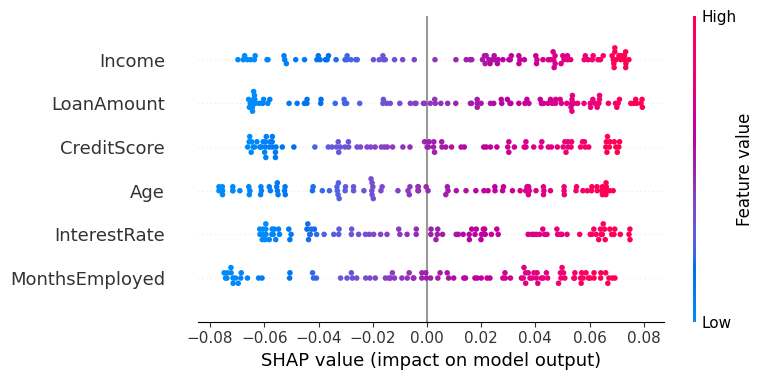

Our SHAP results state that Income, Loan Amount, and Interest Rate tend to be the highest predictors for loan default. This is intuitive since a higher income could imply more capability to pay off debt, while interest rates can suggest that cost of borrowing the inital capital, which is also loan amount. Other indicators such as months employed and age tend to be a little weaker as features considering there are more common instances of new hires and old people still capable of paying loans.

This SHAP result is a bit different compared to the result of the ASMD rankings earlier in the EDA/feature selection portion. In terms of ASMD it was thought that Age, Interest rate, and months employed would be the top 3, but in terms of the SHAP results for the best model its a bit different, wherein the top 3 of ASMD is rather the 4th, 5th, and 6h respectively.

 ## X. Summary, Conclusion, and Recommendations
Recall earlier that the data has a uniform distribution, meaning there are no distinct characteristics to identify if a person will default. Defaulting is by pure luck and chance in this dataset.As you can see earlier there was a trend of high accuracy scores, high accuracy scores of this simply means that the dataset is imbalanced (90% normal and 10% anomaly) and models tend to generally predict normal values more than anomalies.Therefore, there are limitations on the capabilities of machine learning predictions especially when the training dataset is biased and skewed towards one direction or if they have no general indicators of patterns and uniqueness at all.

As much as possible when performing forecasting, try to get a sample of the data where the distribution is balanced among the outcome values.
There is no solution on random outcomes, it is hard to predict stochastic values and it is better to conclude that there are no predictive features that can influence loan defaults in this dataset.
This could be used as a prerequisite on supervised machine learning methods such as regressions to identify if there is a correlation between variables or not.


Considering that the nature of the dataset is mostly synthetic, our group recommends finding a database that generally reflects more of the real life case of borrowing instead of the generalized assumption of a default rate of 10%. Aside from SHAP, perhaps other feature importance methods such as LIME and PDP could be implemented as well to determine if there are any consistencies between the ranking of the mentioned features.

## XI. References

References:
IBM. (n.d.). Machine learning for anomaly detection. IBM. Retrieved December 7, 2024, from https://www.ibm.com/think/topics/machine-learning-for-anomaly-detection

Riswanto, U. (2020, February 10). K-means clustering for anomaly detection. Medium. Retrieved December 7, 2024, from https://ujangriswanto08.medium.com/k-means-clustering-for-anomaly-detection-1bbbb0b20b52

GeeksforGeeks. (2021, August 27). Anomaly detection using Isolation Forest. GeeksforGeeks. Retrieved December 7, 2024, from https://www.geeksforgeeks.org/anomaly-detection-using-isolation-forest/

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Autoencoders. In Deep learning (pp. 374–391). MIT Press. Retrieved December 7, 2024, from https://www.deeplearningbook.org/contents/autoencoders.html

Scikit-learn. (2024, April 4). Outlier detection using Local Outlier Factor (LOF). Scikit-learn. Retrieved December 7, 2024, from https://scikit-learn.org/1.6/auto_examples/neighbors/plot_lof_outlier_detection.html